<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/Borsa_Analiz_Arac%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu harika bir fikir\! Projeyi kodlamak ve her adımda neyi neden yaptığımızı, hangi Python kuralını uyguladığımızı açıklamak, öğrendiklerinizi pekiştirmenin en etkili yoludur.

İşte size, **Mini Borsa Analiz Aracı** projesinin kodları, adım adım açıklamaları ve uygulanan Python/Veri Bilimi kriterleri.

-----

## 💻 Proje Kodu ve Detaylı Analiz

### 1\. Kütüphaneleri İçe Aktarma

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Ortalama hesaplama gibi temel işlemler için ekledik
```

**Uygulanan Kriterler ve Kurallar:**

  * **Modül Kullanımı (Konu 6):** Projemizin iskeletini oluşturacak ana kütüphaneleri `import` anahtar kelimesiyle içe aktardık.
  * **Standart Adlandırma:** Veri biliminde **Pandas** için `pd`, **Matplotlib** için `plt` takma adlarını kullanmak endüstri standardıdır. Bu, kodun başkaları tarafından kolayca anlaşılmasını sağlar.

-----

### 2\. Adım: Veri Simülasyonu (Data Generation)

Gerçekçi bir veri setini taklit eden bir fonksiyon oluşturuyoruz.

```python
def veri_olustur(hisse_adi, baslangic_fiyati):
    """
    Belirtilen hisse adı ve başlangıç fiyatına göre 5 günlük simülasyon verisi oluşturur.
    """
    
    # Gün sayısı
    gun_sayisi = 5
    
    # Tarih Serisi oluşturma (Pandas'ın güçlü bir özelliği)
    tarihler = pd.date_range(start='2024-01-01', periods=gun_sayisi, freq='D')
    
    # Fiyat Simülasyonu: Baslangıç fiyatı etrafında küçük rastgele değişimler
    # np.random.randn() NumPy'den gelir ve normal dağılıma göre rastgele sayı üretir (Konu 9).
    fiyat_degisimi = np.cumsum(np.random.randn(gun_sayisi) * 0.5)
    fiyatlar = baslangic_fiyati + fiyat_degisimi
    
    veri = {
        'Kapanis_Fiyati': fiyatlar,
        'Hacim': np.random.randint(100000, 500000, gun_sayisi), # Rastgele hacim
        'Hisse': hisse_adi
    }
    
    df = pd.DataFrame(veri, index=tarihler) # Tarihleri index olarak atayarak oluşturma
    return df
```

**Uygulanan Kriterler ve Kurallar:**

  * **Fonksiyon Kullanımı (Konu 6):** Tüm bu veri oluşturma mantığını `veri_olustur` adlı bir fonksiyon içine aldık. Bu, kodun tekrar kullanılabilirliğini artırır (DRY Prensibi).
  * **Docstring:** Fonksiyonun hemen altına üç tırnak (`"""..."""`) içine açıklama ekledik. Bu, fonksiyonun ne işe yaradığını özetleyen standart bir Python kuralıdır.
  * **DataFrame Oluşturma (Konu 10):** NumPy dizilerini kullanarak hazırladığımız veriyi, borsa analizinde kilit rol oynayan **DataFrame** yapısına dönüştürdük.

-----

### 3\. Adım: Veri Analizi ve İstatistik

Veri setinden temel istatistikleri çıkaran ve sonuçları gösteren fonksiyon.

```python
def analiz_ve_ozet(df):
    """
    DataFrame'den temel istatistikleri hesaplar ve özetler.
    """
    
    # Pandas metotlarını kullanma
    en_yuksek = df['Kapanis_Fiyati'].max()
    en_dusuk = df['Kapanis_Fiyati'].min()
    ortalama = df['Kapanis_Fiyati'].mean()
    
    # Koşullu Filtreleme (Pandas Konu 10)
    yuksek_hacim = df[df['Hacim'] > df['Hacim'].mean()]
    
    print(f"\n--- {df['Hisse'].iloc[0]} Analizi ---")
    print(f"Toplam Gün Sayısı: {df.shape[0]}") # shape[0] satır sayısını verir
    print(f"En Yüksek Fiyat: {en_yuksek:.2f}")
    print(f"En Düşük Fiyat: {en_dusuk:.2f}")
    print(f"Ortalama Kapanış Fiyatı: {ortalama:.2f}")
    print(f"Ortalama Hacmin Üzerindeki Günler: {len(yuksek_hacim)}")
    
    return en_yuksek # Bir değer döndürmeyi unutmuyoruz
```

**Uygulanan Kriterler ve Kurallar:**

  * **Pandas Metotları (Konu 10):** `max()`, `min()`, `mean()` gibi gömülü Pandas metotlarını kullandık. Bu metotlar, standart Python döngülerine göre çok daha hızlıdır.
  * **F-Stringler (Konu 1):** `f"..."` formatıyla, değişkenleri metin çıktısının içine hızlı ve okunaklı bir şekilde yerleştirdik.

-----

### 4\. Adım: Veri Görselleştirme

Analiz sonuçlarını görsel olarak sunan fonksiyon.

```python
def grafik_ciz(df, hisse_adi):
    """
    Hisse senedi kapanış fiyatlarını gösteren çizgi grafiği çizer.
    """
    
    plt.figure(figsize=(12, 6)) # Görselleştirmenin boyutunu belirledik
    
    # 1. Çizgi Grafiği (Kapanış Fiyatı)
    plt.plot(df.index, df['Kapanis_Fiyati'], label='Kapanış Fiyatı',
             color='blue', linewidth=2)
    
    # 2. Ortalama Çizgisi (Pandas Serisi)
    plt.axhline(df['Kapanis_Fiyati'].mean(), color='red', linestyle='--',
                label='Ortalama Fiyat') # axhline yatay bir çizgi çizer
    
    # Başlıklar ve Etiketler
    plt.title(f"{hisse_adi} Hisse Fiyat ve Ortalama Eğilimi", fontsize=16)
    plt.xlabel("Tarih")
    plt.ylabel("Fiyat ($)")
    plt.legend() # Label'ları gösterir
    plt.grid(axis='y', linestyle='--') # Sadece y ekseninde ızgara
    
    plt.show() # Grafiği ekranda gösterir
```

**Uygulanan Kriterler ve Kurallar:**

  * **Matplotlib Kullanımı (Konu 11):** Veri analizinin en önemli adımı olan görselleştirmeyi yaptık.
  * **Açıklayıcı Görselleştirme:** Başlık, eksen etiketleri (`xlabel`, `ylabel`) ve açıklama (`legend`) ekledik. İyi bir veri görselleştirmesi, kendi kendini açıklayabilmelidir.

-----

### 5\. Adım: Ana Çalışma Bloğu

Programın başlangıç noktası.

```python
# Kullanıcıdan bilgi alma (Opsiyonel: Hata Yönetimi eklenebilir)
hisse_sembolu = input("Lütfen analiz etmek istediğiniz hisse sembolünü girin (Örn: AAPL): ").upper()
baslangic_fiyati = float(input("Lütfen başlangıç fiyatını girin (Örn: 150.0): "))

if __name__ == "__main__":
    
    print(f"\n--- {hisse_sembolu} için veri simülasyonu başlatılıyor. ---")
    
    try:
        # 1. Veriyi oluştur
        hisse_data = veri_olustur(hisse_sembolu, baslangic_fiyati)
        
        # 2. Verinin ilk 3 satırını göster (Konu 10: Kontrol amaçlı)
        print("\nOluşturulan Veri Setinin İlk 3 Satırı:")
        print(hisse_data.head(3))
        
        # 3. Analiz ve özet
        analiz_sonucu = analiz_ve_ozet(hisse_data)
        
        # 4. Grafik
        grafik_ciz(hisse_data, hisse_sembolu)
        
    except ValueError:
        # Hata Yönetimi (Konu 7): Kullanıcının sayı yerine metin girmesini yakalar
        print("\n[HATA] Lütfen başlangıç fiyatı için geçerli bir sayı giriniz.")
    except Exception as e:
        # Genel Hata Yakalama
        print(f"\n[HATA] Beklenmeyen bir sorun oluştu: {e}")
```

**Uygulanan Kriterler ve Kurallar:**

  * **Hata Yönetimi (Konu 7):** `try...except` bloğu kullandık. Bu sayede, kullanıcı başlangıç fiyatı için metin girdiğinde program çökmez, bunun yerine kullanıcıya kibar bir hata mesajı gösterilir.
  * **`if __name__ == "__main__":` Bloğu:** Bu standart Python yapısı, kodun bir modül olarak içe aktarılması durumunda çalışmasını engeller, sadece dosya doğrudan çalıştırıldığında çalışmasını sağlar (en iyi uygulama).
  * **Kullanıcı Etkileşimi:** `input()` ile programı dinamik hale getirdik.

Bu proje, temel Python programlama mantığını, veri yapılarını ve veri bilimi kütüphanelerini nasıl bir araya getireceğinizi gösteren sağlam bir başlangıçtır. İyi çalışmalar\!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Ortalama hesaplama gibi temel işlemler için ekledik

In [2]:
def veri_olustur(hisse_adi, baslangic_fiyati):
    """
    Belirtilen hisse adı ve başlangıç fiyatına göre 5 günlük simülasyon verisi oluşturur.
    """

    # Gün sayısı
    gun_sayisi = 5

    # Tarih Serisi oluşturma (Pandas'ın güçlü bir özelliği)
    tarihler = pd.date_range(start='2024-01-01', periods=gun_sayisi, freq='D')

    # Fiyat Simülasyonu: Baslangıç fiyatı etrafında küçük rastgele değişimler
    # np.random.randn() NumPy'den gelir ve normal dağılıma göre rastgele sayı üretir (Konu 9).
    fiyat_degisimi = np.cumsum(np.random.randn(gun_sayisi) * 0.5)
    fiyatlar = baslangic_fiyati + fiyat_degisimi

    veri = {
        'Kapanis_Fiyati': fiyatlar,
        'Hacim': np.random.randint(100000, 500000, gun_sayisi), # Rastgele hacim
        'Hisse': hisse_adi
    }

    df = pd.DataFrame(veri, index=tarihler) # Tarihleri index olarak atayarak oluşturma
    return df

In [3]:
def analiz_ve_ozet(df):
    """
    DataFrame'den temel istatistikleri hesaplar ve özetler.
    """

    # Pandas metotlarını kullanma
    en_yuksek = df['Kapanis_Fiyati'].max()
    en_dusuk = df['Kapanis_Fiyati'].min()
    ortalama = df['Kapanis_Fiyati'].mean()

    # Koşullu Filtreleme (Pandas Konu 10)
    yuksek_hacim = df[df['Hacim'] > df['Hacim'].mean()]

    print(f"\n--- {df['Hisse'].iloc[0]} Analizi ---")
    print(f"Toplam Gün Sayısı: {df.shape[0]}") # shape[0] satır sayısını verir
    print(f"En Yüksek Fiyat: {en_yuksek:.2f}")
    print(f"En Düşük Fiyat: {en_dusuk:.2f}")
    print(f"Ortalama Kapanış Fiyatı: {ortalama:.2f}")
    print(f"Ortalama Hacmin Üzerindeki Günler: {len(yuksek_hacim)}")

    return en_yuksek # Bir değer döndürmeyi unutmuyoruz

In [4]:
def grafik_ciz(df, hisse_adi):
    """
    Hisse senedi kapanış fiyatlarını gösteren çizgi grafiği çizer.
    """

    plt.figure(figsize=(12, 6)) # Görselleştirmenin boyutunu belirledik

    # 1. Çizgi Grafiği (Kapanış Fiyatı)
    plt.plot(df.index, df['Kapanis_Fiyati'], label='Kapanış Fiyatı',
             color='blue', linewidth=2)

    # 2. Ortalama Çizgisi (Pandas Serisi)
    plt.axhline(df['Kapanis_Fiyati'].mean(), color='red', linestyle='--',
                label='Ortalama Fiyat') # axhline yatay bir çizgi çizer

    # Başlıklar ve Etiketler
    plt.title(f"{hisse_adi} Hisse Fiyat ve Ortalama Eğilimi", fontsize=16)
    plt.xlabel("Tarih")
    plt.ylabel("Fiyat ($)")
    plt.legend() # Label'ları gösterir
    plt.grid(axis='y', linestyle='--') # Sadece y ekseninde ızgara

    plt.show() # Grafiği ekranda gösterir

Lütfen analiz etmek istediğiniz hisse sembolünü girin (Örn: AAPL): AAPL
Lütfen başlangıç fiyatını girin (Örn: 150.0): 400

--- AAPL için veri simülasyonu başlatılıyor. ---

Oluşturulan Veri Setinin İlk 3 Satırı:
            Kapanis_Fiyati   Hacim Hisse
2024-01-01      399.331363  205531  AAPL
2024-01-02      399.064018  433364  AAPL
2024-01-03      398.782730  447997  AAPL

--- AAPL Analizi ---
Toplam Gün Sayısı: 5
En Yüksek Fiyat: 399.75
En Düşük Fiyat: 398.70
Ortalama Kapanış Fiyatı: 399.13
Ortalama Hacmin Üzerindeki Günler: 3


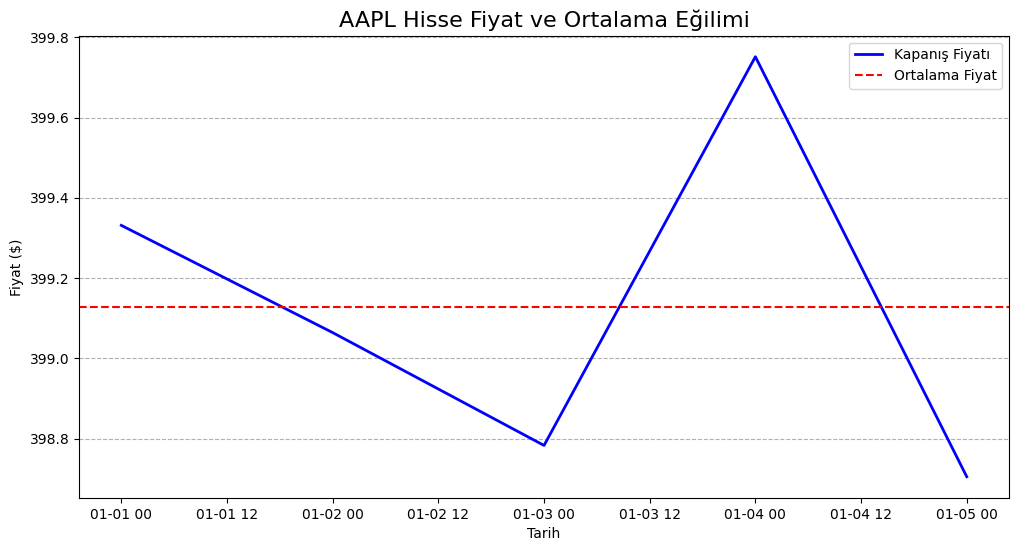

In [5]:
# Kullanıcıdan bilgi alma (Opsiyonel: Hata Yönetimi eklenebilir)
hisse_sembolu = input("Lütfen analiz etmek istediğiniz hisse sembolünü girin (Örn: AAPL): ").upper()
baslangic_fiyati = float(input("Lütfen başlangıç fiyatını girin (Örn: 150.0): "))

if __name__ == "__main__":

    print(f"\n--- {hisse_sembolu} için veri simülasyonu başlatılıyor. ---")

    try:
        # 1. Veriyi oluştur
        hisse_data = veri_olustur(hisse_sembolu, baslangic_fiyati)

        # 2. Verinin ilk 3 satırını göster (Konu 10: Kontrol amaçlı)
        print("\nOluşturulan Veri Setinin İlk 3 Satırı:")
        print(hisse_data.head(3))

        # 3. Analiz ve özet
        analiz_sonucu = analiz_ve_ozet(hisse_data)

        # 4. Grafik
        grafik_ciz(hisse_data, hisse_sembolu)

    except ValueError:
        # Hata Yönetimi (Konu 7): Kullanıcının sayı yerine metin girmesini yakalar
        print("\n[HATA] Lütfen başlangıç fiyatı için geçerli bir sayı giriniz.")
    except Exception as e:
        # Genel Hata Yakalama
        print(f"\n[HATA] Beklenmeyen bir sorun oluştu: {e}")